In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2024-01-06 10:02:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2024-01-06 10:02:54 (1.39 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df=pd.read_csv("/content/FuelConsumption.csv")

In [25]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [26]:
cdf=df[["ENGINESIZE","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [27]:
cdf

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...
1062,3.0,13.4,9.8,11.8,271
1063,3.2,13.2,9.5,11.5,264
1064,3.0,13.4,9.8,11.8,271
1065,3.2,12.9,9.3,11.3,260


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train, test=train_test_split(df,test_size=0.2)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [33]:
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

In [34]:
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])

In [37]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(train_x)

array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  5.3 , 28.09],
       ...,
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  5.  , 25.  ]])

In [39]:
from sklearn import linear_model
li_regr=linear_model.LinearRegression()
li_regr.fit(poly.fit_transform(train_x),train_y)

LinearRegression()

In [41]:
print(li_regr.coef_)
print(li_regr.intercept_)


[[ 0.         50.76075153 -1.52529261]]
[107.81357149]


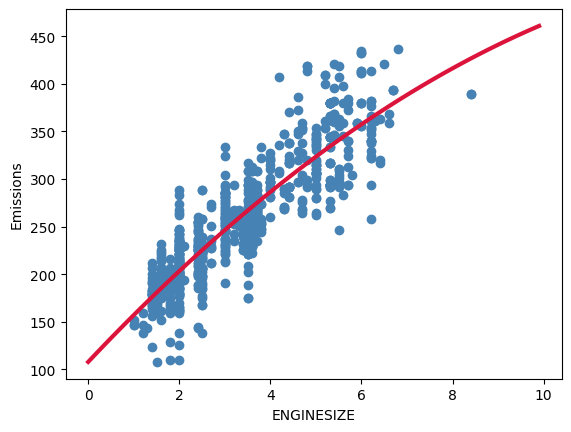

In [45]:
plt.scatter(x=train.ENGINESIZE,y=train.CO2EMISSIONS,color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = li_regr.intercept_[0] + li_regr.coef_[0][1] * XX + li_regr.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [ ]:
# Evaluation

In [53]:
from sklearn.metrics import mean_absolute_error,r2_score
test=poly.transform(test_x)
predict=li_regr.predict(test)
round(r2_score(test_y,predict),2)

0.72

In [57]:
poly = PolynomialFeatures(degree=3)
poly.fit_transform(train_x)

LinearRegression()

In [58]:
li_regr=linear_model.LinearRegression()
li_regr.fit(poly.fit_transform(train_x),train_y)


LinearRegression()

In [60]:
print(li_regr.coef_)
print(li_regr.intercept_)

[[ 0.         27.31134596  4.88831067 -0.52867603]]
[132.89327325]


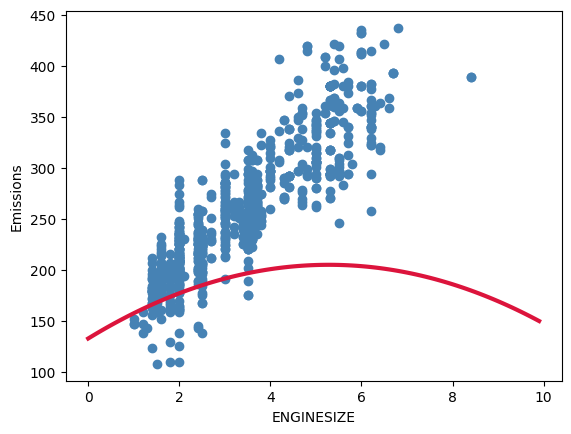

In [66]:
plt.scatter(x=train.ENGINESIZE,y=train.CO2EMISSIONS,color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = li_regr.intercept_[0] + li_regr.coef_[0][1] * XX + li_regr.coef_[0][2]*li_regr.coef_[0][3]*np.power(XX,2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [65]:
test=poly.transform(test_x)
predict=li_regr.predict(test)
round(r2_score(test_y,predict),2)

0.72

In [68]:
print(f"Mean Absolute Error(MAE): {np.mean(np.absolute(predict - test_y)):.2f}")
print(f"Mean Squared Error(MSE): {np.mean(np.absolute(predict - test_y)**2):.2f}")
print(f"R2-Score: {r2_score(test_y, predict):.2f}")

Mean Absolute Error(MAE): 25.48
Mean Squared Error(MSE): 1115.09
R2-Score: 0.72
